In [1]:
import os

import dotenv


In [2]:
dotenv.load_dotenv()

True

In [3]:
# curl -X 'GET' \
#   'http://18.119.195.247:8080/GR33NMAYHEM_1/Project-Zebra/0.1/retrieve_all_for_media?access_token=EAAJZBJx8sWJMBOwmPaWxAD4A2eO9uZAfZBwSZAWgDxvWRfZBSXLfGCZCQk9bkuMatfwJfDWUWJqii2EN03XstTWgbljalEAZB3ZCOXIoU07YG4kRXJir5FzeBLVd35Vdw0dzJgM01dDedKXRiaZBS6P5gy5ILvTi1AW1j1PYSxwTavG1HPeG0NTyg4JmMy3ZBU1uwwGT3AmMgPOGFXGuXC2AZDZD&media_id=17967218341895309' \
#   -H 'accept: application/json'

# call this link to get all the comments for a media

In [4]:
import requests


def get_json_response(url):
    headers = {
        "accept": "application/json",
    }

    try:
        response = requests.get(url, headers=headers)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the response as needed
            print(response.json())
            return response.elapsed.total_seconds(), response.json()
        else:
            # If the request was not successful, print an error message
            print(f"Error: {response.status_code}")
            return -1, {}
    except Exception as e:
        print(f"An error occurred: {e}")


In [5]:
#A method to call the API for specific media_id and time range
def test_analysis_range(media_id, start_time, end_time):
    # create url using media_id and time range
    url = "http://18.119.195.247:8080/GR33NMAYHEM_1/Project-Zebra/0.1/get_analysis_range?media_id={0}&start_time={1}&end_time={2}".format(
        media_id, start_time, end_time)
    json_response_time, json_response = get_json_response(url)
    # Print the JSON response
    if json_response:
        print(json_response)
    return json_response, json_response_time


def test_analysis_all(media_id):
    # create url using media_id and time range
    url = "http://18.119.195.247:8080/GR33NMAYHEM_1/Project-Zebra/0.1/get_analysis_all?media_id={0}".format(
        media_id)
    json_response_time, json_response = get_json_response(url)
    # Print the JSON response
    if json_response:
        print(json_response)
    return json_response, json_response_time


def test_analysis_latest(media_id):
    # create url using media_id and time range
    url = "http://18.119.195.247:8080/GR33NMAYHEM_1/Project-Zebra/0.1/get_analysis_latest?media_id={0}".format(
        media_id)
    json_response_time, json_response = get_json_response(url)
    # Print the JSON response
    if json_response:
        print(json_response)
    return json_response, json_response_time


def test_retrieve_all(media_id):
    # create url using media_id and time range
    url = "http://18.119.195.247:8080/GR33NMAYHEM_1/Project-Zebra/0.1/retrieve_all_for_media?access_token={0}&media_id={1}".format(
        os.getenv('FB_TOKEN'), media_id)
    json_response_time, json_response = get_json_response(url)
    # Print the JSON response
    if json_response:
        print(json_response)
    return json_response, json_response_time

In [6]:
media_ids = ["18199968451168415", "17996406685483772", "18235437283122031", "17967218341895309"]

In [7]:
# run tests for all media ids and save the results in a dictionary
results = {}
for media_id in media_ids:
    data, time = test_retrieve_all(media_id)
    results[media_id] = {"retrieve_all": {"data": data, "time": time}}


{'average_magnitude': 0.1020408067472127, 'id': '18199968451168415', 'sentiment_scores': [{'date': 1701148355.0, 'id': '17980846253608417', 'score': -0.699999988079071, 'text': "Honestly, it's a bit monotonous."}, {'date': 1701148348.0, 'id': '18079343947416771', 'score': -0.800000011920929, 'text': "I don't see myself listening to this again."}, {'date': 1701148341.0, 'id': '18037486405615292', 'score': -0.800000011920929, 'text': "Seems like it's trying too hard to be trendy."}, {'date': 1701148333.0, 'id': '18009069809109630', 'score': -0.800000011920929, 'text': 'The song lacks a distinctive identity.'}, {'date': 1701148177.0, 'id': '17850817425092915', 'score': -0.20000000298023224, 'text': "I just can't get into the groove of this one."}, {'date': 1701148169.0, 'id': '17868696296982147', 'score': -0.800000011920929, 'text': 'I find the melody forgettable, unfortunately.'}, {'date': 1701148159.0, 'id': '18100975846335340', 'score': -0.5, 'text': 'The production could use some refi

In [8]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 4 artists>

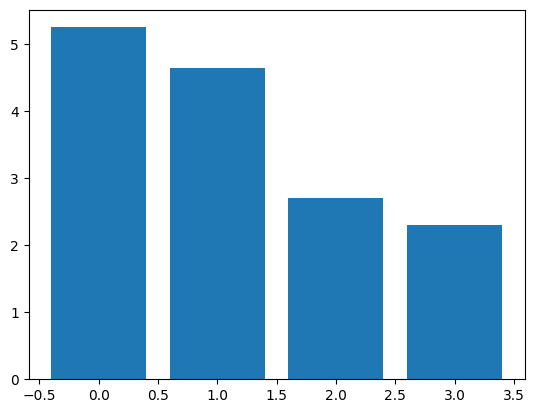

In [9]:
# plot the response times for all media ids
plt.bar(range(len(results)), [results[key]["retrieve_all"]["time"] for key in results.keys()], align='center')